In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit

def conv(x):
    return x.replace(",", ".").encode()
%matplotlib inline

In [4]:
# 1. Kalibrieren der x-Achse, u_e Bestimmung 
# 2. Peaks in allen Messungen bestimmen und Zusammenhang plotten, ue Bestimmung 
# 3. Inhomogenität des Magnetfeldes bestimmen, del B delz Bestimmung 
# 4. Apparatekonstanten hinzufügen

In [39]:
bf1  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfiedl1")), delimiter ="\t", skip_header = 3))
bf2  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield2")), delimiter ="\t", skip_header = 3))
bf3  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield3")), delimiter ="\t", skip_header = 3))
bf4  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield4")), delimiter ="\t", skip_header = 3))
bf5  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield5")), delimiter ="\t", skip_header = 3))
bf6  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield6")), delimiter ="\t", skip_header = 3))
bf7  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield7")), delimiter ="\t", skip_header = 3))
bf8  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield8")), delimiter ="\t", skip_header = 3))
bf9  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield9")), delimiter ="\t", skip_header = 3))
bf10 = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield10")), delimiter ="\t", skip_header = 3))
bf11 = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield11")), delimiter ="\t", skip_header = 3))

bfields = [bf1,bf3,bf4,bf5,bf6,bf7,bf8,bf9,bf10,bf11]

a=1
xer = (a)/(2 * np.sqrt(3))

u_val1 = np.sqrt(((bf1[:,0]- 400)/(1000-400)*xer)**2)
u_val2 = np.sqrt(((bf1[:,0]- 400)/(1000-400)*xer + xer)**2 )

u_ges = np.sqrt( (u_val1)**2 + (u_val2)**2 )
print(len(u_ges))

101


[13.33333333  0.96666667]
[13.90909091  0.96909091]
[9.   0.98]
[8.18181818 0.98181818]
[4.90909091 0.98909091]
[3.27272727 0.99272727]
[3.27272727 0.99272727]
[3.27272727 0.99272727]
[2.45454545 0.99454545]
[2.45454545 0.99454545]


c:\Users\jesie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
c:\Users\jesie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
c:\Users\jesie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
c:\Users\jesie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
c:\Users\jesie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
c:\Users\jesie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  

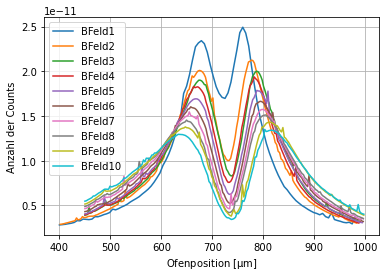

In [81]:
xcalib = [(400,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000)]
ycalib = [(400,980),(450,983),(450,989),(450,990),(450,994),(450,996),(450,996),(450,996),(450,997),(450,997)]

def linear(m,b,x):
    return m*x+b

bcalibrated =[]
for  i in range(len(xcalib)):
    popt,cov = curve_fit(linear,xcalib[i],ycalib[i])
    print(popt)
    bcalibrated.append(popt[1]*bfields[i][:,0]+popt[0])
    plt.plot(popt[1]*bfields[i][:,0]+popt[0],bfields[i][:,1],label="BFeld"+str(i+1))
    plt.xlabel(r"Ofenposition [$\mathrm{\mu m}$]")
    plt.ylabel(r"Anzahl der Counts")
    plt.legend(loc=2)
    plt.grid(True)

In [73]:
def doublegaussian(x: np.ndarray,
    a: float, mu1: float, sigma1: float,
    b: float, mu2: float, sigma2: float,
    y0: float): 
    return (
        y0
        + a * np.exp(-np.abs(x-mu1)**2/sigma1)
        + b * np.exp(-np.abs(x-mu2)**2/sigma2)
    )

In [74]:
def fitdoublegaussian(array,p0):
    x,y = array.T[0:2]
    popt1,pcov1 = curve_fit(doublegaussian,x,y,p0=p0)
    print(popt1)
    plt.scatter(x,y,label="data",s=2)
    plt.plot(x,doublegaussian(x,*popt1),label="fit"+str(i))
    plt.legend(loc=0)
    plt.show()
    #plt.savefig("doublegauß.png")

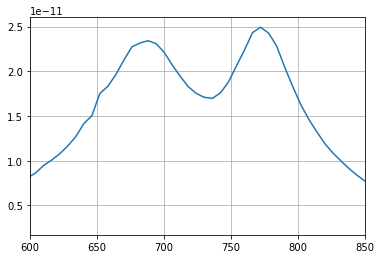

In [75]:
plt.plot(bf1[:,0],bf1[:,1])
plt.xlim(600,850)
plt.grid(True)
#plt.plot(np.arange(0,bf1[:,0]),bf1[:,1])

[1.75703873e-11 6.81938564e+02 3.67454283e+03 1.71550899e-11
 7.80519507e+02 1.95130376e+03 4.32601828e-12]


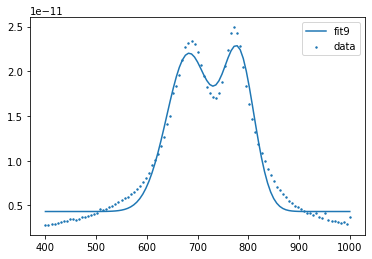

In [76]:
fitdoublegaussian(bf1, (2e-11, 685, 70, 
                          2e-11, 770, 40, 3e-12))

[1.75703074e-11 6.72539822e+02 3.43363442e+03 1.71550779e-11
 7.67835114e+02 1.82346780e+03 4.32599349e-12]


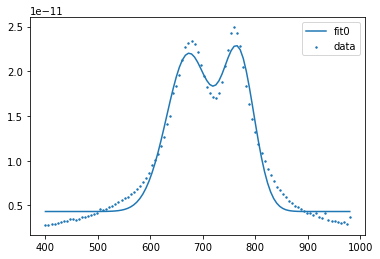

[1.45066674e-11 6.64516052e+02 3.71670660e+03 1.51129405e-11
 7.86127290e+02 2.04912572e+03 4.63348360e-12]


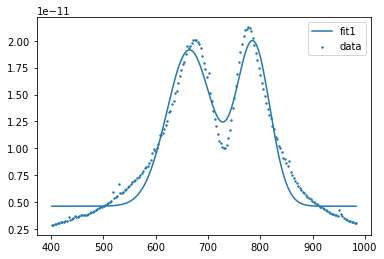

[1.31237376e-11 6.64479998e+02 3.68100905e+03 1.39034973e-11
 7.97584010e+02 2.06743875e+03 5.19162036e-12]


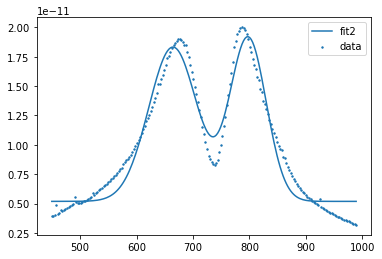

[1.26132579e-11 6.58039503e+02 3.75831519e+03 1.34050567e-11
 7.94082968e+02 2.07438164e+03 5.03530168e-12]


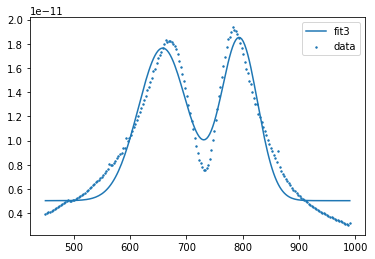

[1.14480953e-11 6.53357975e+02 3.99916689e+03 1.23953153e-11
 8.01512373e+02 2.12425211e+03 5.06831351e-12]


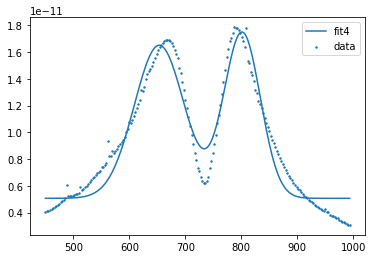

[1.04528525e-11 6.46049280e+02 4.09652163e+03 1.13482232e-11
 8.06539495e+02 2.32733898e+03 5.15353436e-12]


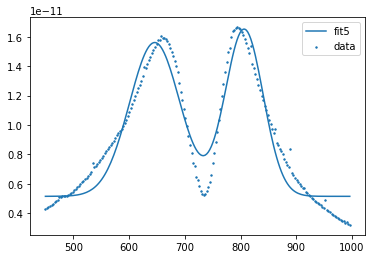

[9.62562715e-12 6.39199581e+02 4.37951710e+03 1.04126261e-11
 8.10488361e+02 2.39237459e+03 5.26011191e-12]


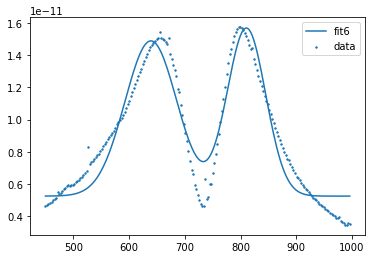

[8.86835941e-12 6.31812697e+02 4.72636851e+03 9.82044740e-12
 8.14688937e+02 2.48741222e+03 5.31070098e-12]


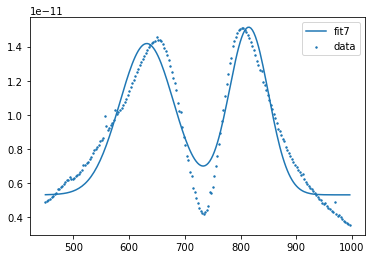

[8.22267151e-12 6.28422970e+02 4.89473714e+03 9.05717764e-12
 8.26329181e+02 2.65581014e+03 5.44986922e-12]


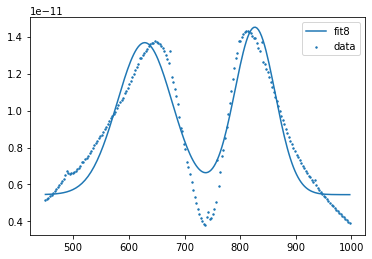

[7.62650256e-12 6.16904438e+02 5.58087449e+03 8.34755703e-12
 8.30423490e+02 2.80652834e+03 5.26728004e-12]


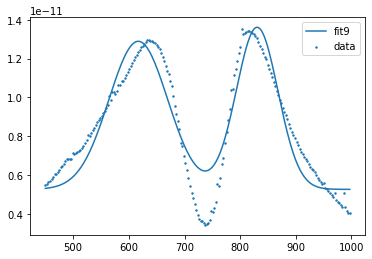

In [101]:
for i in range(len(bcalibrated)):
    test = np.column_stack((bcalibrated[i],bfields[i][:,1]))
    fitdoublegaussian(test, (2e-11, 685, 70, 
                          2e-11, 790, 40, 0e-12))